## Group-level analysis 

In [104]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
np.random.seed(0)

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.linalg
import statsmodels.api as sm

import os
path = '/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts'
fig_path = '/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/figures'
os.chdir(path=path)
from fmri_core import (
    build_roi_voxs,
    build_A1_voxs,
    load_response_trials,
    avg_pop_curvature,
    estimate_snr,
    compute_coherence_spectrum,
    zs,
    subject_xfm,
    stories,
)
from AR_sim_core import (
    make_noiseless_arp,
)

def get_subj_data(data, story, subject, roi_order):
    # returns estimated curvatures (dir(ind)_roi_curv) for one subject, one story
    y = np.full(len(roi_order), np.nan, dtype=float)
    for i, roi in enumerate(roi_order):
        val = data.get(story,{}).get(roi,{}).get(subject,np.nan)
        if np.isfinite(val):
            y[i] = val
    return y 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from collections import defaultdict
dir_roi_curv = defaultdict(lambda: defaultdict(dict))
ar1_roi_coef = defaultdict(lambda: defaultdict(dict))
ind_roi_curv = defaultdict(lambda: defaultdict(dict))
roi_voxs_subj = defaultdict(lambda: defaultdict(list))
private_signal_std = 1.0
subjects = list(subject_xfm.keys())

for story in stories:
    for subject in subjects:
        try:
            response_trials = load_response_trials(subject, story)
        except FileNotFoundError:
            print(f"Skipping {subject} – {story} (no data)")
            continue

        run_avg_resp = np.mean(response_trials, axis=0)
        nT = run_avg_resp.shape[0]
        roi_voxs = build_roi_voxs(subject)
        roi_voxs_subj[subject] = roi_voxs

        for roi, roi_voxels in roi_voxs.items():
            # 1) get direct population curvature values
            curvature = avg_pop_curvature(run_avg_resp[:, roi_voxels])
            dir_roi_curv[story][roi][subject] = curvature

            # 2) fit AR(1) to ROI averages
            roi_demean_resp = zs(np.mean(run_avg_resp[:, roi_voxels], axis=1))
            ar1_model = sm.tsa.AutoReg(roi_demean_resp, lags=1).fit()
            ar1_coef = float(ar1_model.params[1])
            ar1_roi_coef[story][roi][subject] = ar1_coef

            # 3) indirect curvature estimates 
            n_voxs_roi = len(roi_voxels)

            # make this reproducible per (story, subject, roi)
            seed = (hash((story, subject, roi)) % (2**32 - 1))
            rng = np.random.default_rng(seed)

            private_signal_innov = rng.standard_normal((n_voxs_roi, nT)) * private_signal_std
            roi_rec_noiseless_ts = make_noiseless_arp(ar1_coef, nT, n_voxs_roi, private_signal_innov)
            ind_curvature = avg_pop_curvature(roi_rec_noiseless_ts)
            ind_roi_curv[story][roi][subject] = ind_curvature
    



Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)


/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:171: RuntimeWarning: invalid value encountered in divide
  coss = dots / (norms[1:] * norms[:-1])
/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:172: RuntimeWarning: invalid value encountered in arccos
  angles = np.degrees(np.arccos(coss))


Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Skipping S4 – fromboyhoodtofatherhood (no data)
Skipping S5 – fromboyhoodtofatherhood (no data)
Skipping S6 – fromboyhoodtofatherhood (no data)
Skipping S7 – fromboyhoodtofatherhood (no data)
Cutting 0 overlapping voxels (should be < ~50)


/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:171: RuntimeWarning: invalid value encountered in divide
  coss = dots / (norms[1:] * norms[:-1])
/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:172: RuntimeWarning: invalid value encountered in arccos
  angles = np.degrees(np.arccos(coss))


Skipping BFD003 – fromboyhoodtofatherhood (no data)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Skipping S4 – onapproachtopluto (no data)
Skipping S5 – onapproachtopluto (no data)
Skipping S6 – onapproachtopluto (no data)
Skipping S7 – onapproachtopluto (no data)
Skipping BFD001 – onapproachtopluto (no data)
Cutting 0 overlapping voxels (should be < ~50)


In [85]:
# CHAT
from collections import defaultdict
import numpy as np
import statsmodels.api as sm

dir_roi_curv = defaultdict(lambda: defaultdict(dict))   # story -> roi -> subject -> value
ar1_roi_coef = defaultdict(lambda: defaultdict(dict))   # story -> roi -> subject -> value
ind_roi_curv = defaultdict(lambda: defaultdict(dict))   # story -> roi -> subject -> value

roi_voxs_subj = defaultdict(dict)  # subject -> roi -> list of voxel indices

private_signal_std = 1.0
subjects = list(subject_xfm.keys())

# 1) Build and SAVE roi voxel lists ONCE per subject
for subject in subjects:
    roi_voxs = build_roi_voxs(subject)  # should return dict: roi -> list/array of voxels
    # store a copy to avoid accidental mutation/aliasing
    roi_voxs_subj[subject] = {roi: list(voxs) for roi, voxs in roi_voxs.items()}

# 2) Main loop over story/subject
for story in stories:
    for subject in subjects:
        try:
            response_trials = load_response_trials(subject, story)
        except FileNotFoundError:
            print(f"Skipping {subject} – {story} (no data)")
            continue

        run_avg_resp = np.mean(response_trials, axis=0)  # (time, voxels)
        nT = run_avg_resp.shape[0]

        roi_voxs = roi_voxs_subj[subject]

        for roi, roi_voxels in roi_voxs.items():
            if len(roi_voxels) == 0:
                continue

            # 1) direct population curvature
            curvature = avg_pop_curvature(run_avg_resp[:, roi_voxels])
            dir_roi_curv[story][roi][subject] = float(curvature)

            # 2) AR(1) on ROI-mean time series
            ts = np.mean(run_avg_resp[:, roi_voxels], axis=1)  # (time,)
            ts_z = zs(ts)

            if (not np.all(np.isfinite(ts_z))) or (np.nanstd(ts_z) == 0):
                continue

            ar1_model = sm.tsa.AutoReg(ts_z, lags=1).fit()
            ar1_coef = float(ar1_model.params[1])
            ar1_roi_coef[story][roi][subject] = ar1_coef

            # 3) indirect curvature (reconstructed noiseless ARP)
            n_voxs_roi = len(roi_voxels)
            seed = hash((story, subject, roi)) % (2**32 - 1)
            rng = np.random.default_rng(seed)

            private_signal_innov = rng.standard_normal((n_voxs_roi, nT)) * private_signal_std
            roi_rec_noiseless_ts = make_noiseless_arp(ar1_coef, nT, n_voxs_roi, private_signal_innov)

            ind_curvature = avg_pop_curvature(roi_rec_noiseless_ts)
            ind_roi_curv[story][roi][subject] = float(ind_curvature)


Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)
Cutting 0 overlapping voxels (should be < ~50)


/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:182: RuntimeWarning: invalid value encountered in divide
  Build a dict roi_voxs[roi_name] -> voxel indices (1D indices into masked voxels)
/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:183: RuntimeWarning: invalid value encountered in arccos
  combining functional and anatomical ROIs.


Skipping S4 – fromboyhoodtofatherhood (no data)
Skipping S5 – fromboyhoodtofatherhood (no data)
Skipping S6 – fromboyhoodtofatherhood (no data)
Skipping S7 – fromboyhoodtofatherhood (no data)


/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:182: RuntimeWarning: invalid value encountered in divide
  Build a dict roi_voxs[roi_name] -> voxel indices (1D indices into masked voxels)
/Users/jiamingxu/Desktop/Desktop - Jiaming’s MacBook Pro/Language_straightening/scripts/fmri_core.py:183: RuntimeWarning: invalid value encountered in arccos
  combining functional and anatomical ROIs.


Skipping BFD003 – fromboyhoodtofatherhood (no data)
Skipping S4 – onapproachtopluto (no data)
Skipping S5 – onapproachtopluto (no data)
Skipping S6 – onapproachtopluto (no data)
Skipping S7 – onapproachtopluto (no data)
Skipping BFD001 – onapproachtopluto (no data)


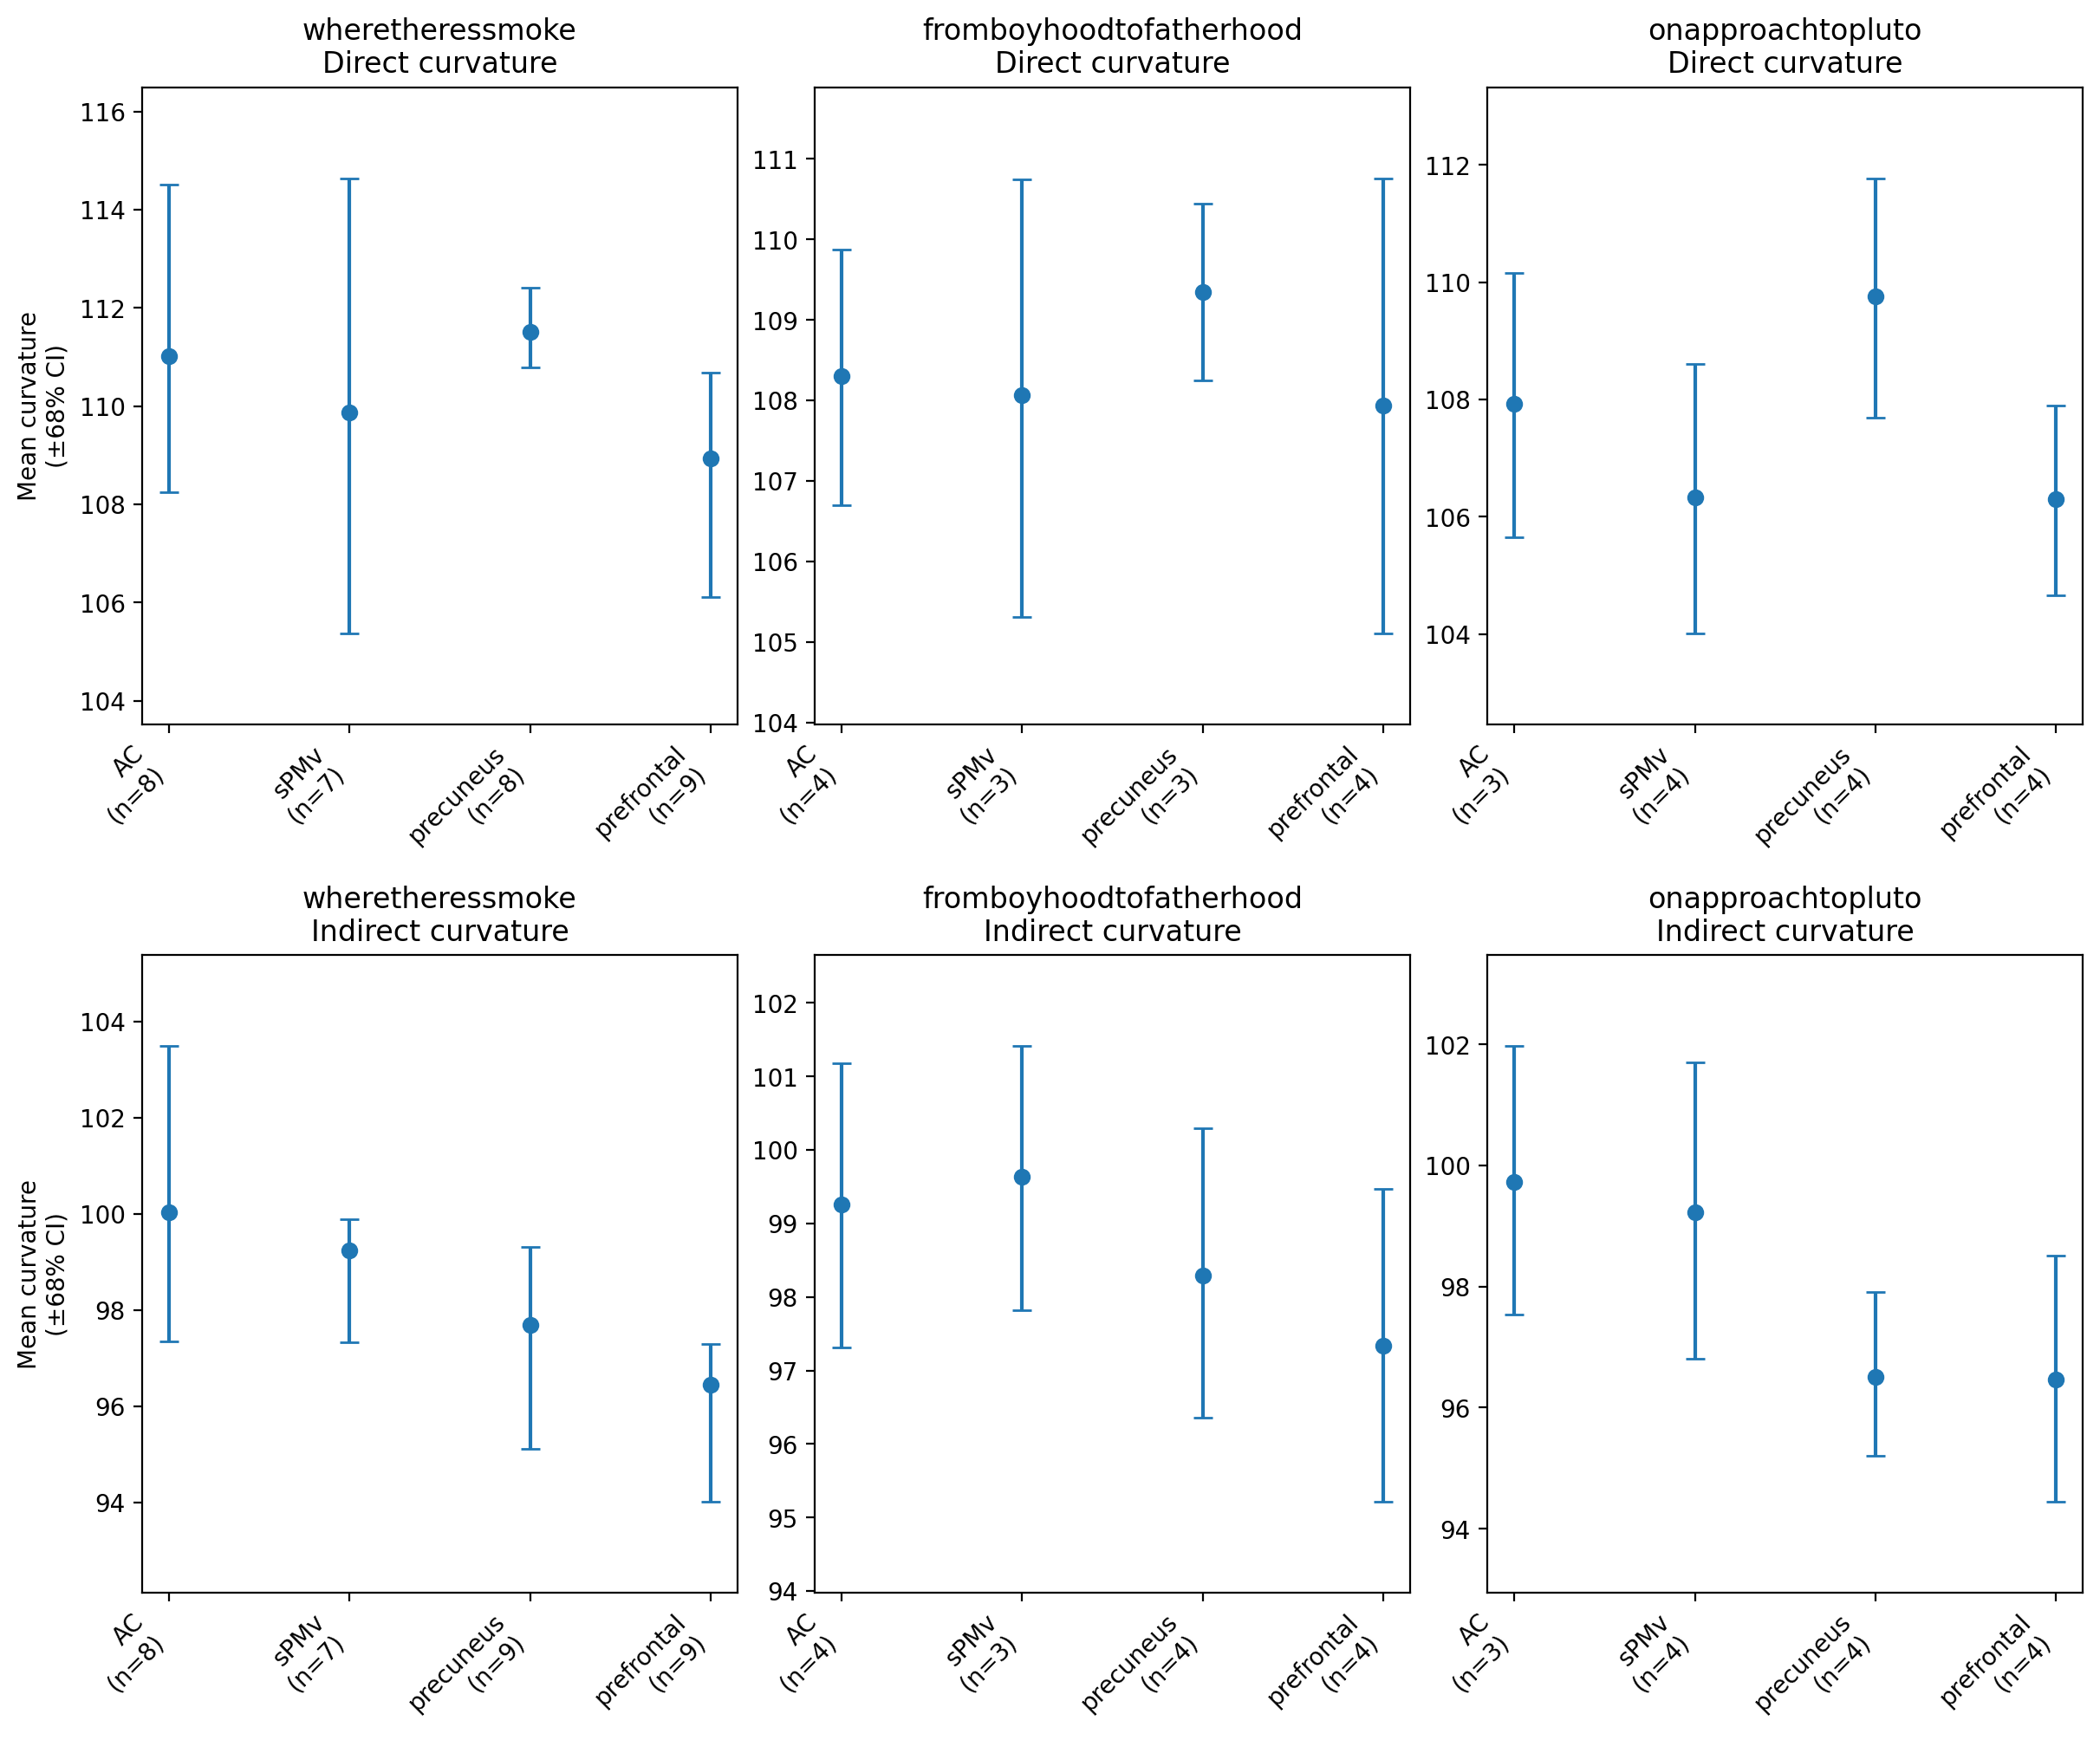

In [91]:
roi_order = ["AC", "sPMv", "precuneus", "prefrontal"]
def mean_ci(vals, level=0.68):
    vals = np.asarray(vals, dtype=float)
    vals = vals[np.isfinite(vals)]
    if len(vals) == 0:
        return np.nan, np.nan, np.nan, 0

    lo_q = (1 - level) / 2 * 100
    hi_q = (1 + level) / 2 * 100

    mean = vals.mean()
    lo, hi = np.percentile(vals, [lo_q, hi_q])

    return mean, mean - lo, hi - mean, len(vals)


fig, axes = plt.subplots(
    nrows=2,
    ncols=len(stories),
    figsize=(4 * len(stories), 10),  # taller than wide
    constrained_layout=True
)

x = np.arange(len(roi_order))

for col, story in enumerate(stories):

    # Row 0: Direct curvature
    ax = axes[0, col]

    means, elo, ehi, ns = [], [], [], []
    for roi in roi_order:
        vals = list(dir_roi_curv.get(story, {}).get(roi, {}).values())
        m, lo, hi, n = mean_ci(vals, level=0.68)
        means.append(m)
        elo.append(lo)
        ehi.append(hi)
        ns.append(n)

    ax.errorbar(
        x, means,
        yerr=[elo, ehi],
        fmt="o",
        capsize=4
    )

    ax.set_title(f"{story}\nDirect curvature")
    ax.set_xticks(x)
    ax.set_xticklabels(
        [f"{r}\n(n={n})" for r, n in zip(roi_order, ns)],
        rotation=45,
        ha="right"
    )

    if col == 0:
        ax.set_ylabel("Mean curvature\n(±68% CI)")

    ax.margins(y=0.2)

    # Row 1: Indirect curvature
    ax = axes[1, col]

    means, elo, ehi, ns = [], [], [], []
    for roi in roi_order:
        vals = list(ind_roi_curv.get(story, {}).get(roi, {}).values())
        m, lo, hi, n = mean_ci(vals, level=0.68)
        means.append(m)
        elo.append(lo)
        ehi.append(hi)
        ns.append(n)

    ax.errorbar(
        x, means,
        yerr=[elo, ehi],
        fmt="o",
        capsize=4
    )

    ax.set_title(f"{story}\nIndirect curvature")
    ax.set_xticks(x)
    ax.set_xticklabels(
        [f"{r}\n(n={n})" for r, n in zip(roi_order, ns)],
        rotation=45,
        ha="right"
    )

    if col == 0:
        ax.set_ylabel("Mean curvature\n(±68% CI)")

    ax.margins(y=0.2)

plt.show()


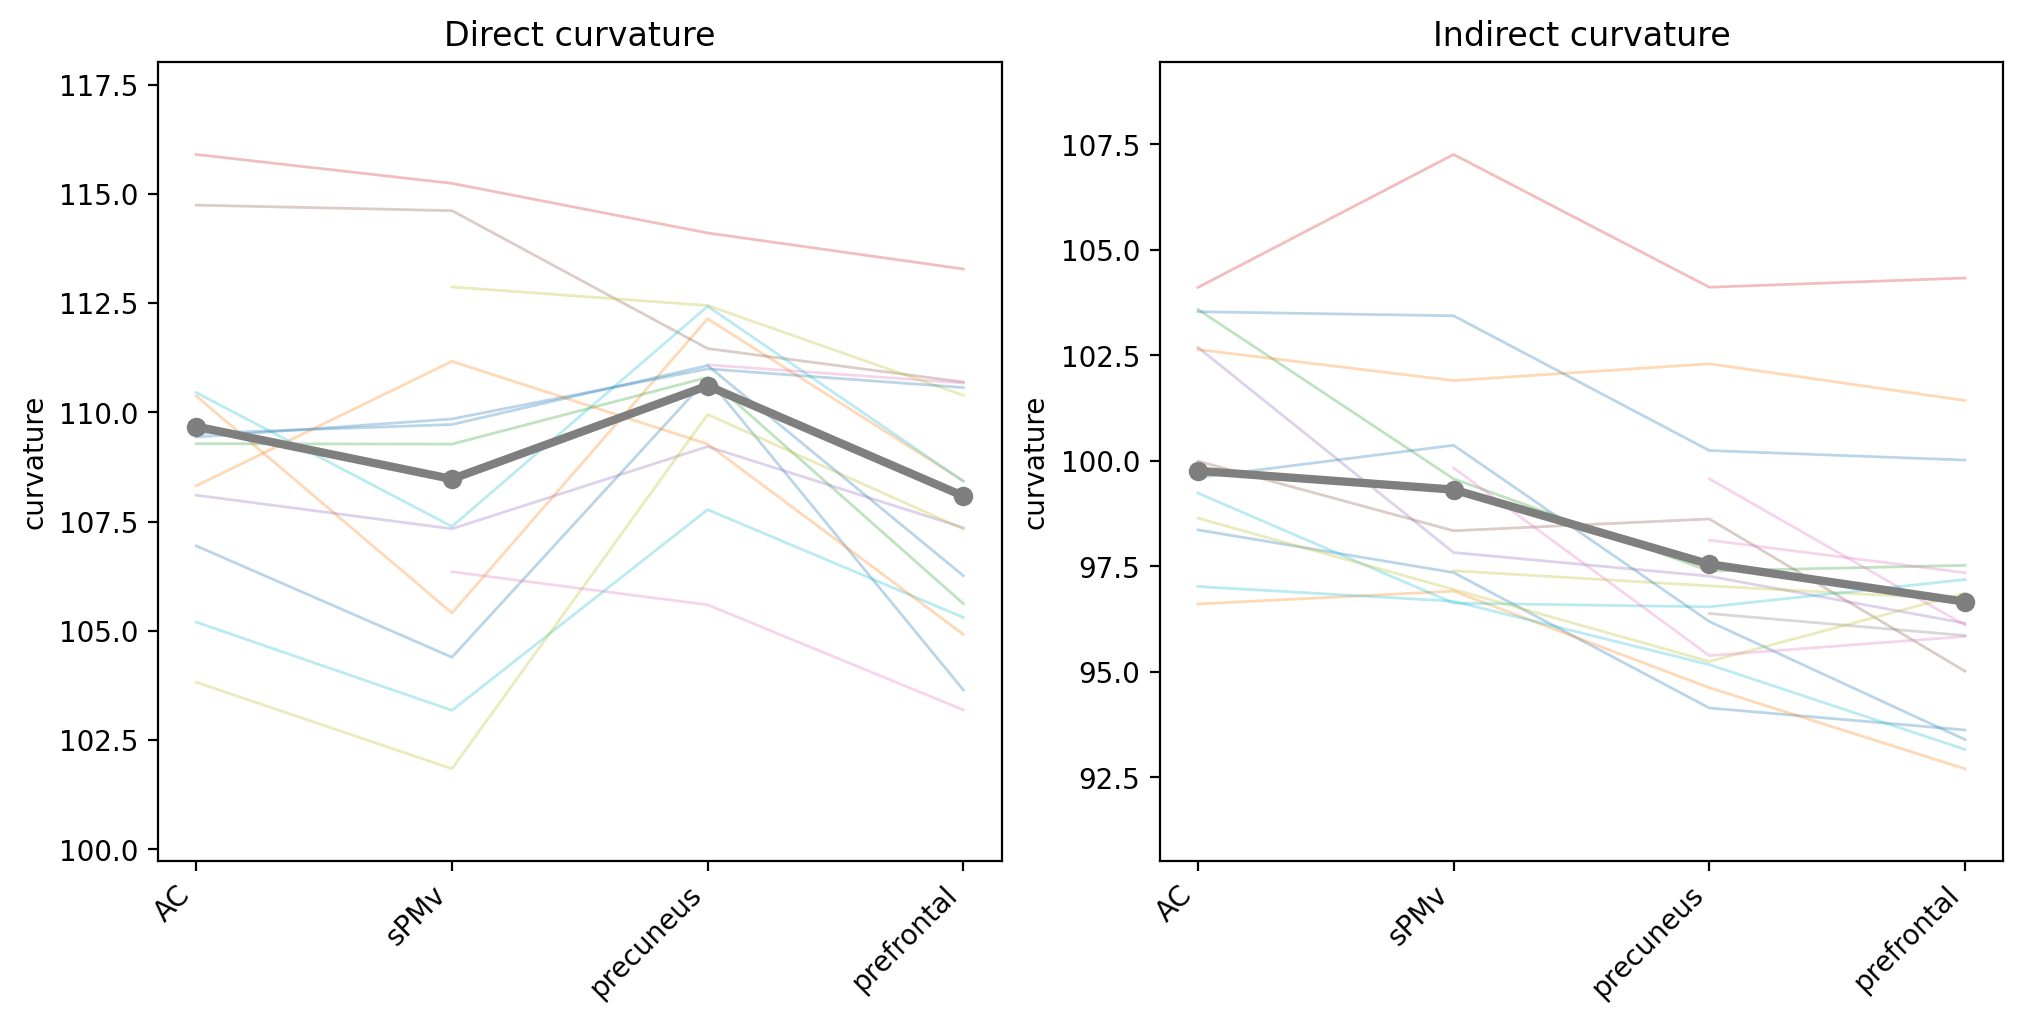

In [92]:
roi_order = ["AC", "sPMv", "precuneus", "prefrontal"]

def get_subj_data(data, story, subject, roi_order):
    y = np.full(len(roi_order), np.nan, dtype=float)
    for i, roi in enumerate(roi_order):
        val = data.get(story,{}).get(roi,{}).get(subject,np.nan)
        if np.isfinite(val):
            y[i] = val
    return y 

def get_mean(data, stories, roi_order):
    mean = np.full(len(roi_order), np.nan)
    n = np.zeros(len(roi_order))

    for r, roi in enumerate(roi_order):
        all_vals = []
        for story in stories:
            subj2vals = data.get(story,{}).get(roi,{})
            vals = np.array(list(subj2vals.values()), dtype=float)
            vals = vals[np.isfinite(vals)]
            all_vals.extend(vals)
        mean[r] = float(np.mean(all_vals))
        n[r] = len(all_vals)

    return mean, n

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)
x = np.arange(len(roi_order))
# dir curv
ax = axes[0]
dir_mean, dir_n = get_mean(dir_roi_curv, stories, roi_order)
for story in stories:
    for subj in subjects:
        y = get_subj_data(dir_roi_curv, story, subj, roi_order) #for all ROIs
        ax.plot(x, y, linewidth=1, alpha=0.3)
ax.plot(x, dir_mean, linewidth=3, marker="o")
ax.set_title("Direct curvature")
ax.set_xticks(x)
ax.set_xticklabels(roi_order, rotation=45, ha='right')
ax.set_ylabel("curvature")
ax.margins(y=0.15)


# indir curv
ax = axes[1]
ind_mean, ind_n = get_mean(ind_roi_curv, stories, roi_order)
for story in stories:
    for subj in subjects:
        y = get_subj_data(ind_roi_curv, story, subj, roi_order) #for all ROIs
        ax.plot(x, y, linewidth=1, alpha=0.3)
ax.plot(x, ind_mean, linewidth=3, marker="o")
ax.set_title("Indirect curvature")
ax.set_xticks(x)
ax.set_xticklabels(roi_order, rotation=45, ha='right')
ax.set_ylabel("curvature")
ax.margins(y=0.15)

            


##### Statistics


1. Non-parametric Wilcoxon test on direct and indirect curvatures

In [93]:
from scipy.stats import wilcoxon

dir_deltas_by_subj = defaultdict(list)  # subj -> [delta across stories]
ind_deltas_by_subj = defaultdict(list)

for story in stories:
    for subj in subjects:
        y_dir = get_subj_data(dir_roi_curv, story, subj, roi_order)
        delta_dir = y_dir[-1] - y_dir[0]
        if np.isfinite(delta_dir):
            dir_deltas_by_subj[subj].append(delta_dir)

        y_ind = get_subj_data(ind_roi_curv, story, subj, roi_order)
        delta_ind = y_ind[-1] - y_ind[0]
        if np.isfinite(delta_ind):
            ind_deltas_by_subj[subj].append(delta_ind)

# Collapse within subject: subj -> single number (median across that subject's stories)
dir_median_by_subj = []
ind_median_by_subj = []
dir_deltas_pooled = []
ind_deltas_pooled = []

for subj in subjects:
    d = np.array(dir_deltas_by_subj.get(subj, []), dtype=float)
    d = d[np.isfinite(d)]
    dir_median_by_subj.append(np.median(d) if d.size > 0 else np.nan)
    dir_deltas_pooled.extend(d.tolist())

    d = np.array(ind_deltas_by_subj.get(subj, []), dtype=float)
    d = d[np.isfinite(d)]
    ind_median_by_subj.append(np.median(d) if d.size > 0 else np.nan)
    ind_deltas_pooled.extend(d.tolist())

# filtering out nans
dir_median_by_subj = np.array(dir_median_by_subj, dtype=float)
dir_median_by_subj = dir_median_by_subj[np.isfinite(dir_median_by_subj)]
ind_median_by_subj = np.array(ind_median_by_subj, dtype=float)
ind_median_by_subj = ind_median_by_subj[np.isfinite(ind_median_by_subj)]
dir_deltas_pooled = np.array(dir_deltas_pooled, dtype=float)
dir_deltas_pooled = dir_deltas_pooled[np.isfinite(dir_deltas_pooled)]
ind_deltas_pooled = np.array(ind_deltas_pooled, dtype=float)
ind_deltas_pooled = ind_deltas_pooled[np.isfinite(ind_deltas_pooled)]

# ------ one datapoint per subject ------
# Direct curvature vs 0
stat_dir, p_dir = wilcoxon(dir_median_by_subj)
# stat_dir, p_dir = wilcoxon(dir_median_by_subj, alternative="less") # one-sided
print("Direct curvature: W =", stat_dir, "p =", p_dir)

# Indirect curvature vs 0
stat_ind, p_ind = wilcoxon(ind_median_by_subj)
# stat_ind, p_ind = wilcoxon(ind_median_by_subj, alternative="less") 
print("Indirect curvature: W =", stat_ind, "p =", p_ind)

# ------ pooled -------
# treats each subject×story delta as independent, 
# which is almost certainly false (same subject contributes multiple points). 
# This will typically make p-values too optimistic.

# Direct curvature vs 0
stat_dir, p_dir = wilcoxon(dir_deltas_pooled)
# stat_dir, p_dir = wilcoxon(dir_median_by_subj, alternative="less") # one-sided
print("Pooled direct curvature: W =", stat_dir, "p =", p_dir)
# Indirect curvature vs 0
stat_ind, p_ind = wilcoxon(ind_deltas_pooled)
# stat_ind, p_ind = wilcoxon(ind_median_by_subj, alternative="less") 
print("Pooled indirect curvature: W =", stat_ind, "p =", p_ind)


Direct curvature: W = 4.0 p = 0.0546875
Indirect curvature: W = 3.0 p = 0.0390625
Pooled direct curvature: W = 25.0 p = 0.04791259765625
Pooled indirect curvature: W = 7.0 p = 0.00115966796875


Bootstrap 10000 samples, get 95% CI on dir and ind curvature estimates

In [32]:
nSubj = len(dir_median_by_subj)
nBoot = 10000
median_dir = []
median_ind = []
for b in range(nBoot):
    sample_idx = np.random.choice(nSubj, size=nSubj, replace=True)
    sample_dir = dir_median_by_subj[sample_idx]
    median_dir.append(np.median(sample_dir))
    sample_ind = ind_median_by_subj[sample_idx]
    median_ind.append(np.median(sample_ind))

lb_dir, ub_dir = np.percentile(median_dir, [2.5, 97.5])
lb_ind, ub_ind = np.percentile(median_ind, [2.5, 97.5])

print(lb_dir, ub_dir)
print(lb_ind, ub_ind)

    

-3.4013419771054885 0.00867648533979093
-4.976490320579714 0.17437808778788622


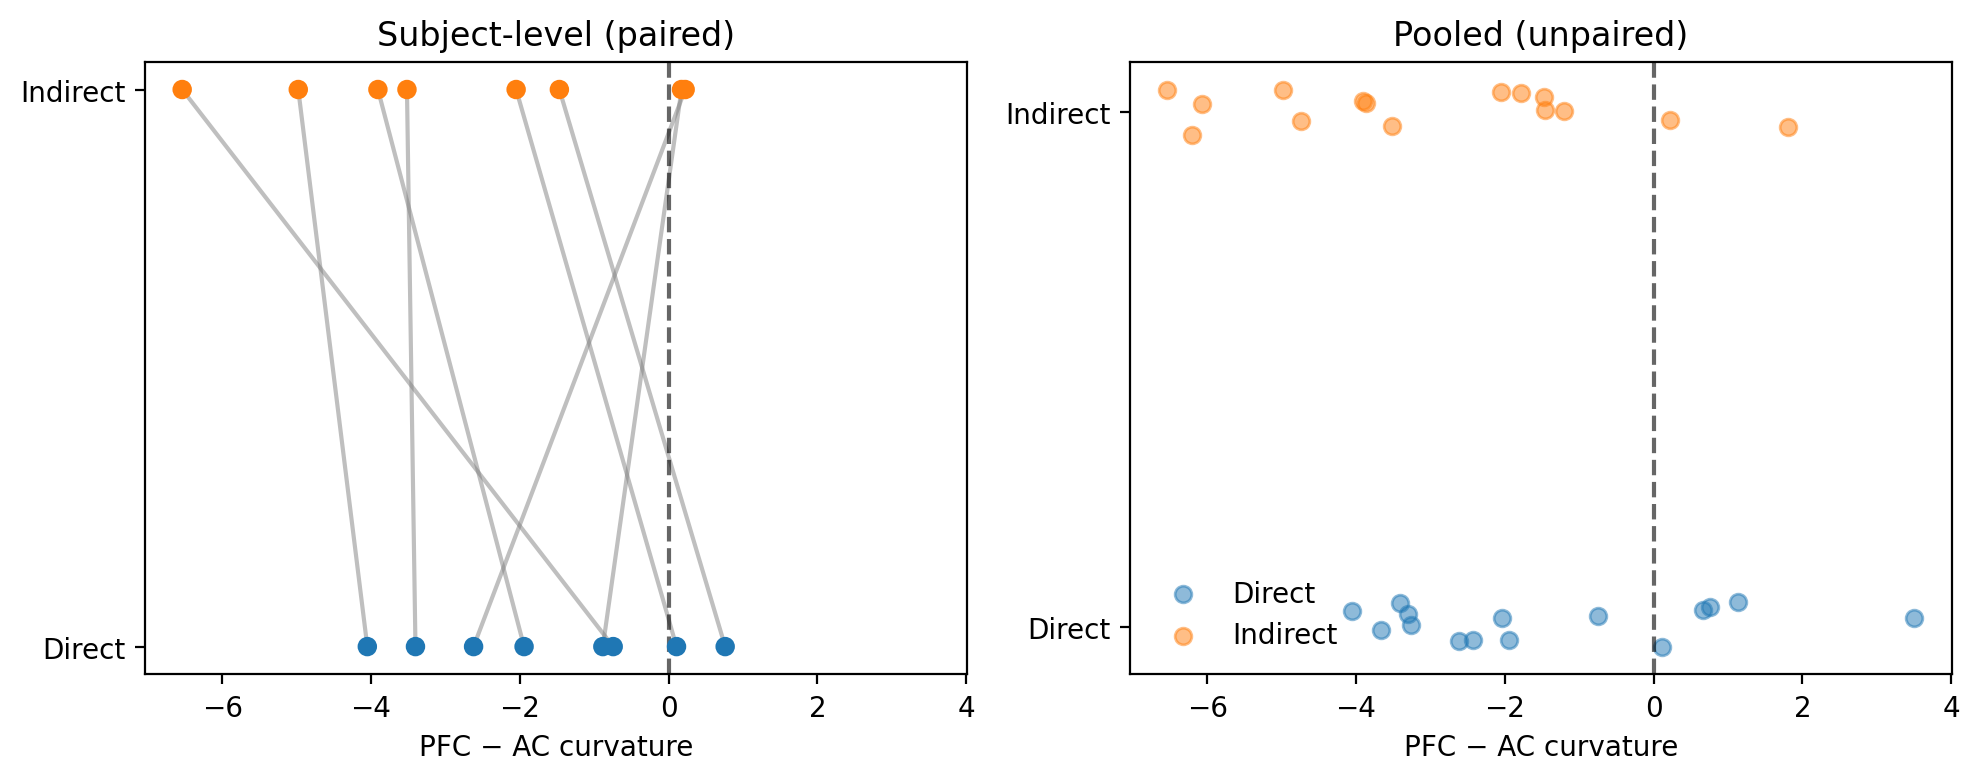

In [ ]:
x = np.array([0, 1])  # y-positions now: 0=Direct, 1=Indirect

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# LEFT: subject-level (paired, lines connecting same subjects)
ax = axs[0]

for d, i in zip(dir_median_by_subj, ind_median_by_subj):
    ax.plot([d, i], x, color="gray", alpha=0.5)
    ax.scatter([d, i], x, color=["tab:blue", "tab:orange"], zorder=3)

ax.axvline(0, color="k", linestyle="--", alpha=0.6)
ax.set_yticks(x)
ax.set_yticklabels(["Direct", "Indirect"])
ax.set_xlabel("PFC − AC curvature")
ax.set_title("Subject-level (paired)")

# RIGHT: pooled (NOT paired)
ax = axs[1]

# jitter to avoid overlap
jitter = 0.05
y_dir = np.zeros_like(dir_deltas_pooled) + np.random.uniform(-jitter, jitter, size=len(dir_deltas_pooled))
y_ind = np.ones_like(ind_deltas_pooled) + np.random.uniform(-jitter, jitter, size=len(ind_deltas_pooled))

ax.scatter(dir_deltas_pooled, y_dir, color="tab:blue", alpha=0.5, label="Direct")
ax.scatter(ind_deltas_pooled, y_ind, color="tab:orange", alpha=0.5, label="Indirect")

ax.axvline(0, color="k", linestyle="--", alpha=0.6)
ax.set_yticks(x)
ax.set_yticklabels(["Direct", "Indirect"])
ax.set_xlabel("PFC − AC curvature")
ax.set_title("Pooled (unpaired)")
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


##### Control analysis 

In [86]:
roi_snrs = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
roi_snrs_range = defaultdict(lambda: defaultdict(dict))

for story in stories:
    for subj in subjects:
        try:
            response_trials = load_response_trials(subj, story)
        except FileNotFoundError:
            print(f"Skipping {subj} – {story} (no data)")
            continue
        roi_voxs = roi_voxs_subj[subj]
        for roi, vox_list in roi_voxs.items():
            snrs = []
            snrs_high = []
            for roi_idx in vox_list:
                snr = estimate_snr(response_trials[:, :, roi_idx])
                snrs.append(snr)

            roi_snrs[story][subj][roi].extend(snrs)

            if len(snrs) > 0:
                roi_snrs_range[story][subj][roi] = [float(np.min(snrs)), float(np.max(snrs))]
                snrs_high.append(np.max(snrs))
                # print(f"{story} | {subj} | {roi} SNR range: {roi_snrs_range[story][subj][roi]}")
            else:
                roi_snrs_range[story][subj][roi] = [np.nan, np.nan]
print(np.max(snrs_high))

Skipping S4 – fromboyhoodtofatherhood (no data)
Skipping S5 – fromboyhoodtofatherhood (no data)
Skipping S6 – fromboyhoodtofatherhood (no data)
Skipping S7 – fromboyhoodtofatherhood (no data)
Skipping BFD003 – fromboyhoodtofatherhood (no data)
Skipping S4 – onapproachtopluto (no data)
Skipping S5 – onapproachtopluto (no data)
Skipping S6 – onapproachtopluto (no data)
Skipping S7 – onapproachtopluto (no data)
Skipping BFD001 – onapproachtopluto (no data)
0.5439744305897527


In [98]:
# bin voxels based on snr
snr_bin_size = 0.2
snr_bin_ub = np.ceil(np.max(snrs_high) / snr_bin_size) * snr_bin_size
snr_bin_edges = np.arange(0, snr_bin_ub + snr_bin_size, snr_bin_size)
# ar1_coef_snr = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
ind_roi_bin_curv = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for story in stories:
    for subj in subjects:
        # first get subject data 
        try:
            response_trials = load_response_trials(subj, story)
            nT = response_trials.shape[1]
        except FileNotFoundError:
            print(f"Skipping {subj} – {story} (no data)")
            continue
        
        # bin voxels in each ROI based on SNRs
        snr_dict = roi_snrs.get(story,{}).get(subj,{})
        roi_voxs = roi_voxs_subj[subj]
        for roi, snrs in snr_dict.items():
            bin_ids = np.digitize(snrs, snr_bin_edges, right=False)
            for bin_id in np.unique(bin_ids):
                bin_voxels = [idx for idx, b in zip(roi_voxs[roi], bin_ids) if b == bin_id]
                if len(bin_voxels) == 0:
                    continue

        # fit AR(1) to each binned responses (per snr bin per ROI)
                binned_responses = response_trials[:,:,bin_voxels]
                ts = np.mean(binned_responses, axis=(0, 2))   # (time,)
                zs_avg_resp = zs(ts)

                # guard: AutoReg can't handle NaN/Inf
                if not np.all(np.isfinite(zs_avg_resp)):
                    continue
                # guard: constant / near-constant series (zscore can be NaN)
                if np.nanstd(zs_avg_resp) == 0:
                    continue
                ar1_model = sm.tsa.AutoReg(zs_avg_resp, lags=1).fit()
                est_alpha = ar1_model.params[1]

                # get indirect curvature estimates
                n_voxs_bin = len(bin_voxels)
                seed = hash((story, subj, roi, int(bin_id))) % (2**32 - 1)
                rng = np.random.default_rng(seed)

                private_signal_innov = rng.standard_normal((n_voxs_bin, nT)) * private_signal_std
                roi_rec_noiseless_ts = make_noiseless_arp(est_alpha, nT, n_voxs_bin, private_signal_innov)

                ind_curvature = avg_pop_curvature(roi_rec_noiseless_ts)
                ind_roi_bin_curv[story][subj][roi][int(bin_id)] = float(ind_curvature)


Skipping S4 – fromboyhoodtofatherhood (no data)
Skipping S5 – fromboyhoodtofatherhood (no data)
Skipping S6 – fromboyhoodtofatherhood (no data)
Skipping S7 – fromboyhoodtofatherhood (no data)
Skipping BFD003 – fromboyhoodtofatherhood (no data)
Skipping S4 – onapproachtopluto (no data)
Skipping S5 – onapproachtopluto (no data)
Skipping S6 – onapproachtopluto (no data)
Skipping S7 – onapproachtopluto (no data)
Skipping BFD001 – onapproachtopluto (no data)


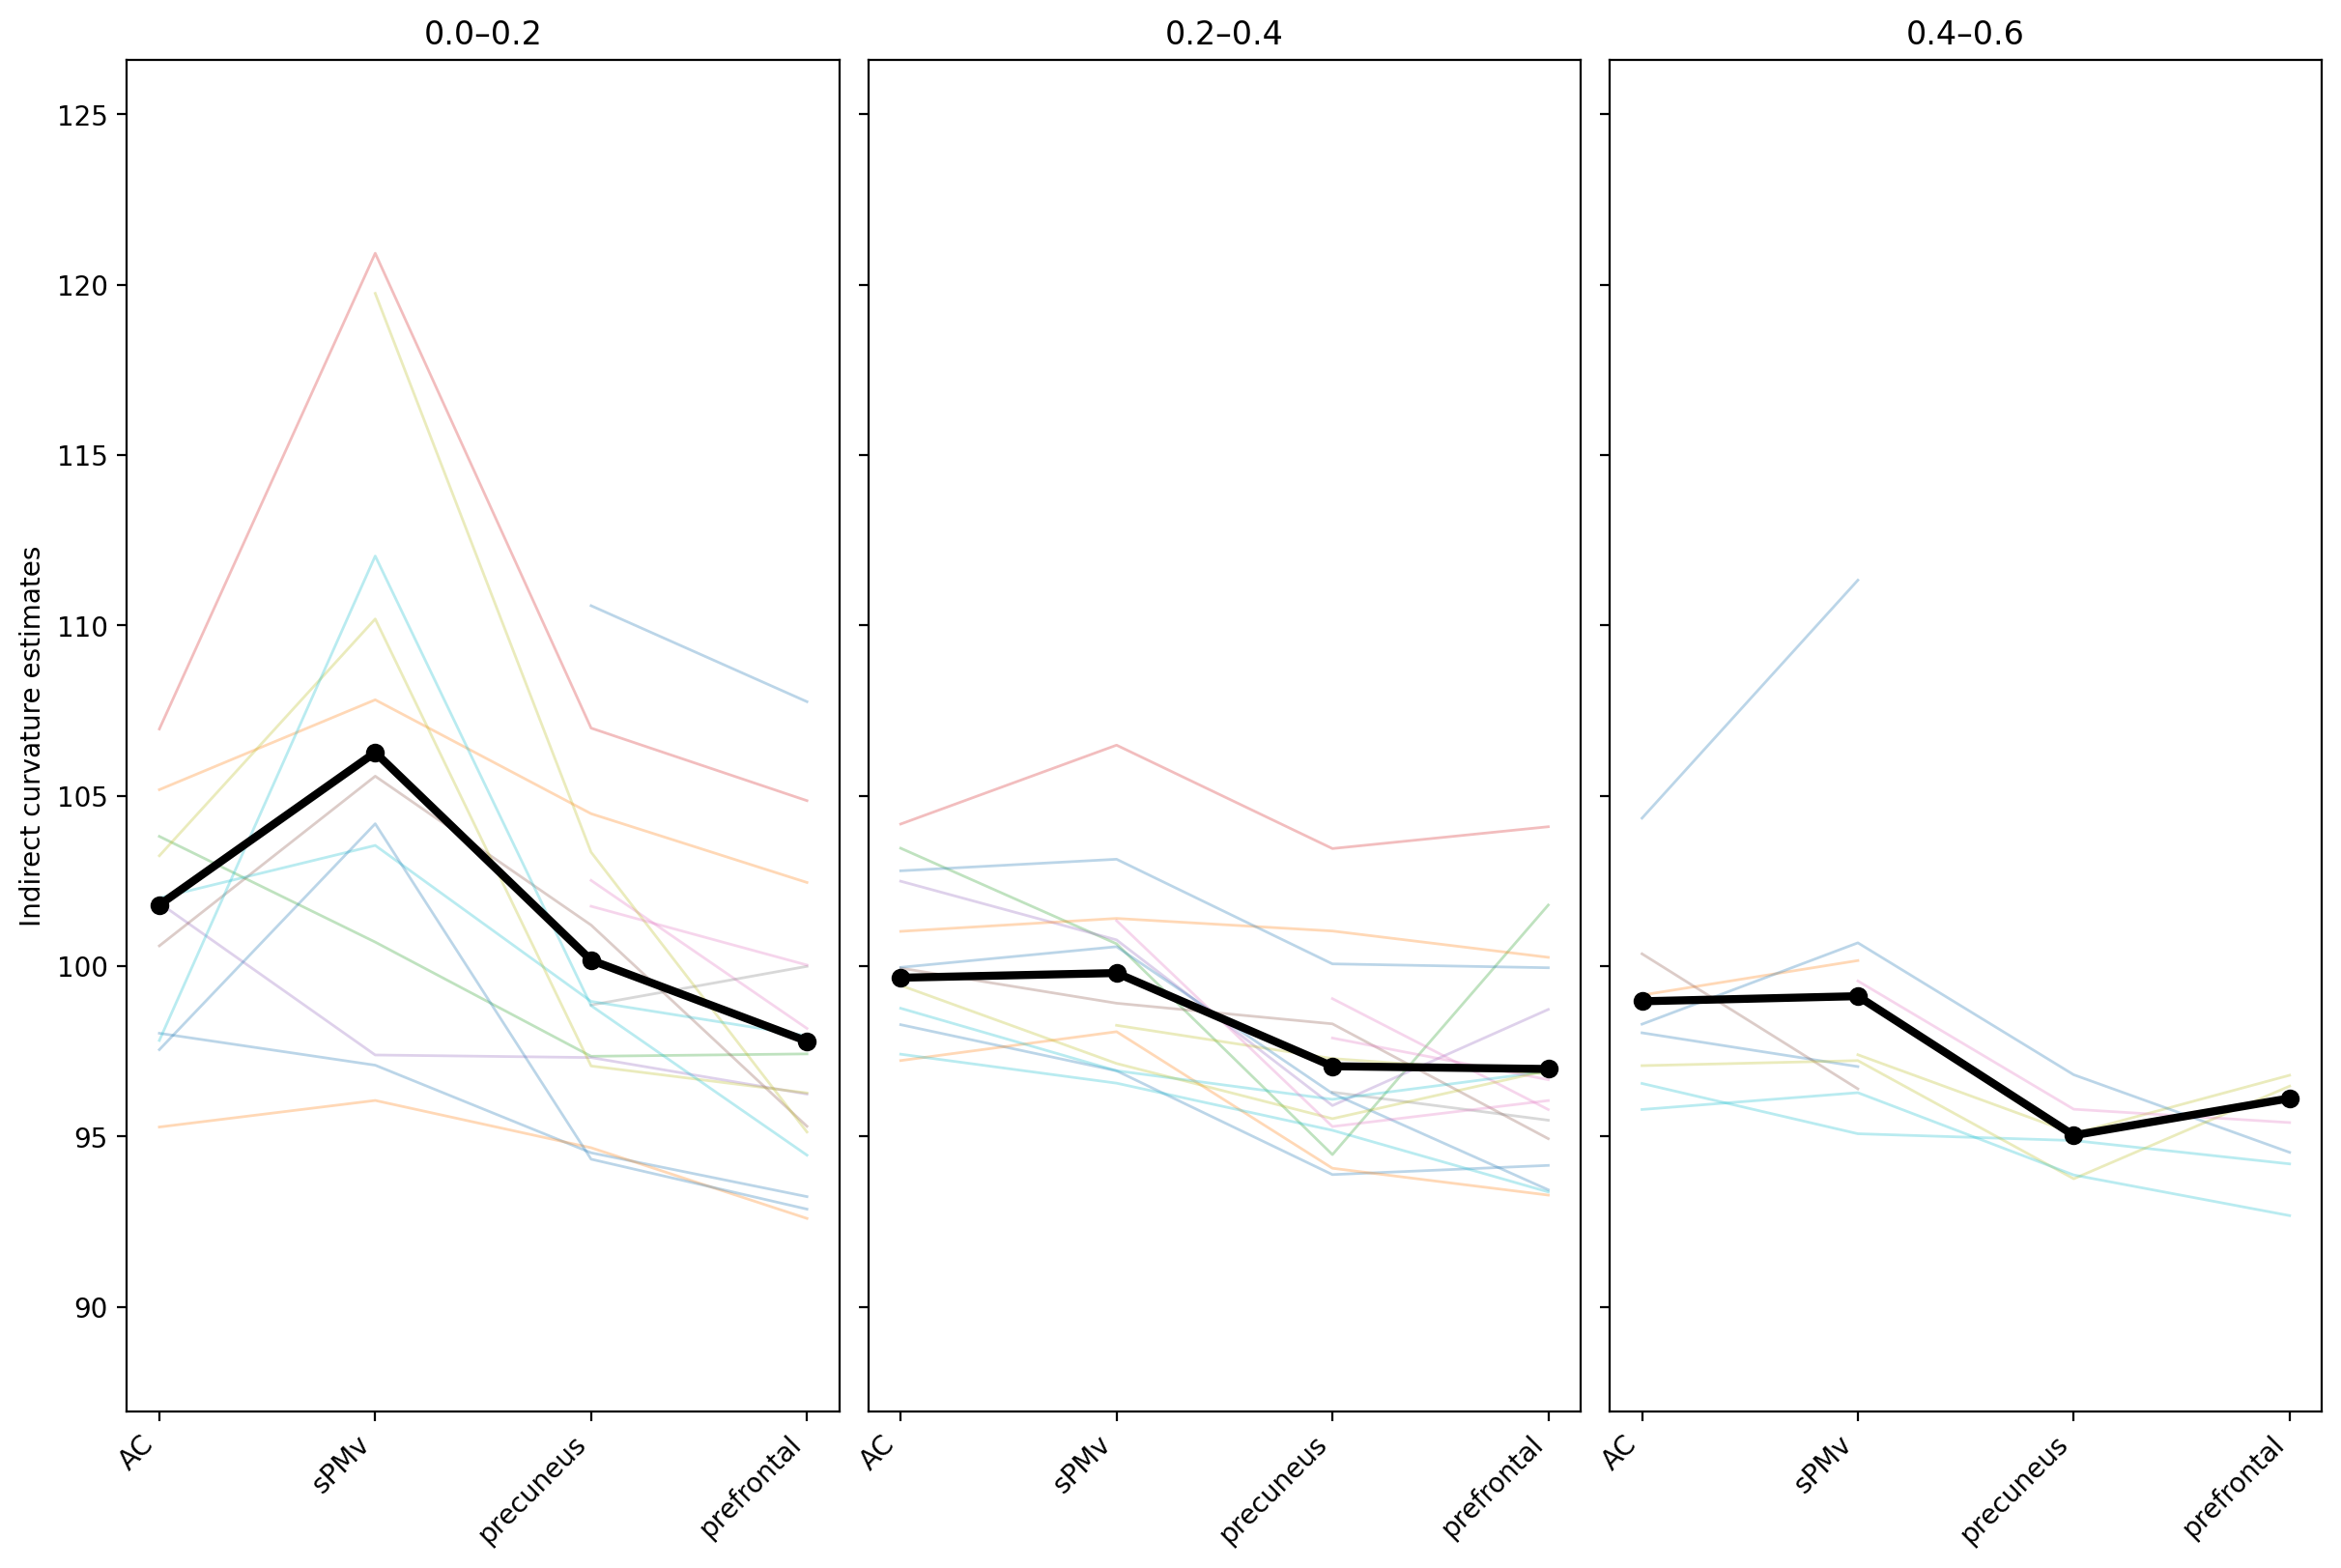

In [102]:
def get_roi_binned_indcurv(ind_roi_bin_curv, story, subj, bin_id, roi_order):
    y = np.full(len(roi_order), np.nan)
    for i, roi in enumerate(roi_order):
        y[i] = (
            ind_roi_bin_curv.get(story, {})
                            .get(subj, {})
                            .get(roi, {})
                            .get(int(bin_id), np.nan)
        )
    return y

# number of real intervals between edges
n_bins = len(snr_bin_edges) - 1

fig, axes = plt.subplots(
    nrows=1,
    ncols=n_bins,
    figsize=(4 * n_bins, 8),
    constrained_layout=True,
    sharey=True
)

axes = np.atleast_1d(axes)
x = np.arange(len(roi_order))

for j, bin_id in enumerate(range(1, n_bins + 1)):  # np.digitize bins start at 1
    ax = axes[j]

    all_y = []

    for story in stories:
        for subj in subjects:
            y = get_roi_binned_indcurv(ind_roi_bin_curv, story, subj, bin_id, roi_order)
            ax.plot(x, y, linewidth=1, alpha=0.3)
            all_y.append(y)

    all_y = np.vstack(all_y)  # (n_curves, n_rois)
    mean_y = np.nanmean(all_y, axis=0)

    # mean line
    ax.plot(
        x, mean_y,
        linewidth=3,
        color="black",
        marker="o",
        zorder=10
    )

    ax.set_title(f"{snr_bin_edges[j]:.1f}–{snr_bin_edges[j+1]:.1f}")
    ax.set_xticks(x)
    ax.set_xticklabels(roi_order, rotation=45, ha="right")
    ax.margins(y=0.2)

axes[0].set_ylabel("Indirect curvature estimates")
plt.show()


##### AR(1) coefficient map -- ask how to average different surfaces!!

In [ ]:
flatmap_kwargs = {
    "recache": False, "pixelwise": True, "sampler": "nearest",
    "height": 1024, "with_rois": True,
    "with_curvature": True, "curvature_threshold": True, "linewidth": 4,
    "nanmean": True
}

voxel_ar1_all = defaultdict(dict)   # voxel_ar1_all[story][subj] = ar1_vec
coh_all       = defaultdict(dict)   # coh_all[story][subj]       = coherence vec

# online accumulators for grand mean
sum_ar1 = None
cnt_ar1 = None
sum_coh = None
cnt_coh = None

for story in stories:
    voxel_ar1_all[story] = {}
    coh_all[story]       = {}

    for subj in subjects:
        try:
            response_trials = load_response_trials(subj, story)
        except FileNotFoundError:
            print(f"Skipping {subj} – {story} (no data)")
            continue

        # response_trials: (repeats, time, voxels)
        run_avg = np.mean(response_trials, axis=0)
        n_vox = run_avg.shape[1]

        # initialize accumulators once
        if sum_ar1 is None:
            sum_ar1 = np.zeros(n_vox)
            cnt_ar1 = np.zeros(n_vox, dtype=int)
            sum_coh = np.zeros(n_vox)
            cnt_coh = np.zeros(n_vox, dtype=int)
        else:
            if n_vox != sum_ar1.shape[0]:
                raise ValueError("Voxel count mismatch across subjects/stories.")

        # AR(1) per voxel
        ar1_vec = np.full(n_vox, np.nan)

        for voxel_idx in range(n_vox):
            voxel_demean_resp = zs(run_avg[:, voxel_idx])
            try:
                ar1_model = sm.tsa.AutoReg(
                    voxel_demean_resp, lags=1, old_names=False
                ).fit()
                ar1_vec[voxel_idx] = ar1_model.params[1]
            except Exception:
                ar1_vec[voxel_idx] = np.nan

        # coherence per voxel (alpha channel)
        freqs, _, _, _, _, coherence_lower = compute_coherence_spectrum(
            response_trials, fs=0.5, nfft=64
        )

        coh_vec = np.nanmean(coherence_lower, axis=0)

        if coh_vec.shape[0] != n_vox:
            raise ValueError("coherence vector length does not match voxel count.")

        # store (optional)
        voxel_ar1_all[story][subj] = ar1_vec
        coh_all[story][subj]       = coh_vec

        # update online means
        m_ar1 = np.isfinite(ar1_vec)
        sum_ar1[m_ar1] += ar1_vec[m_ar1]
        cnt_ar1[m_ar1] += 1

        m_coh = np.isfinite(coh_vec)
        sum_coh[m_coh] += coh_vec[m_coh]
        cnt_coh[m_coh] += 1

# finalize grand means
mean_ar1 = np.full_like(sum_ar1, np.nan)
mask = cnt_ar1 > 0
mean_ar1[mask] = sum_ar1[mask] / cnt_ar1[mask]

mean_coh = np.full_like(sum_coh, np.nan)
mask = cnt_coh > 0
mean_coh[mask] = sum_coh[mask] / cnt_coh[mask]

# plot averaged map
vmin, vmax = np.percentile(mean_ar1[np.isfinite(mean_ar1)], [10, 90])
colorbar_location = (0.90, -0.08, 0.08, 0.5)

vol2d = cortex.Volume2D(
    mean_ar1,
    mean_coh,                  # alpha = mean coherence
    subject, xfmname=xfm,
    cmap="BuWtRd_alpha",
    vmin=vmin, vmax=vmax
)

os.chdir(fig_path)
cortex.quickshow(vol2d, colorbar_location=colorbar_location, **flatmap_kwargs)
plt.savefig("ar1_flatmap_GRANDMEAN.pdf", format="pdf", bbox_inches="tight")
plt.close()
